# Test PPP, qPlanner, and SFA.py

In [1]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams,ticker,gridspec
import random
import time
from IPython.display import clear_output
from sklearn.neighbors import KernelDensity
import glob
import seaborn as sns
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
import multiprocessing
import collections
from shapely.geometry import Point
from matplotlib.path import Path
import colorcet as cc
from itertools import chain
import sys
from logzero import logger

#below for netflow
from __future__ import print_function
import ets_fiber_assigner.netflow as nf
from ics.cobraOps.Bench import Bench
from ics.cobraOps.TargetGroup import TargetGroup
from ics.cobraOps.CobrasCalibrationProduct import CobrasCalibrationProduct
from ics.cobraOps.CollisionSimulator import CollisionSimulator
from ics.cobraOps.cobraConstants import NULL_TARGET_POSITION, NULL_TARGET_ID
from ics.cobraOps import plotUtils
from collections import defaultdict

np.random.seed(1)

In [2]:
## specify the working directory to run ##
workDir='/work/pfs/obsproc/e2e/ppp+qplan+sfa'
repoDir='/work/pfs/obsproc/e2e/src/repo'

## you probably need to set up the path ##
sys.path.append(os.path.join(repoDir, 'pfs_obsproc_planning_tools/python/obsproc/planning'))
sys.path.append(os.path.join(repoDir, 'datamodel/python'))
sys.path.append(os.path.join(repoDir, 'pfs_utils/python'))

import generatePfsDesign

config='configs/config.toml'

### Run PPP

In [3]:
## call instance ##
gpd = generatePfsDesign.GeneratePfsDesign(config, workDir, repoDir)

######### Read sample
#There are     9 proposals loaded.
  #   59350 targets require the LOW resolution
  #       0 targets require the MEDIUM resolution
######### Read sample DONE! (takes 2.728 sec)
######### Determine pointing centers
#There are 59350 targets, they are grouped into 8 clusters.
#There are    10 pointings determined.
######### Determine pointing centers DONE! (takes 41.777 sec)


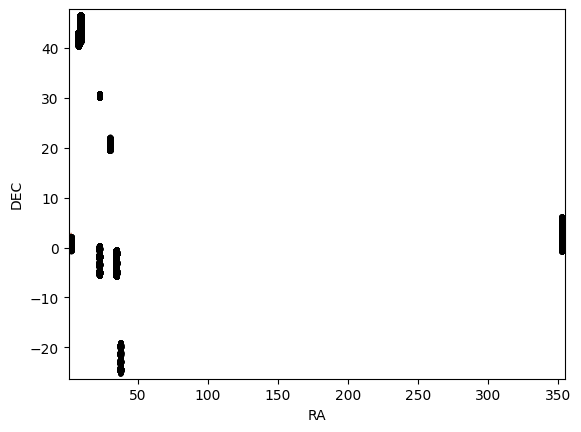

######### Start running netflow to assign fibers
#There are    10 pointings, they are grouped into     2 clusters.
#Now is Group   1, it contains     6 pointings, and    764 targets.
Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-20
Set parameter Presolve to value 1
Set parameter Method to value 4
Set parameter DegenMoves to value 0
Set parameter Heuristics to value 0.8
Set parameter MIPGap to value 0.01
Creating network topology
  exposure 1
Calculating visibilities
adding constraints
adding collision constraints
adding forbidden pair constraints
  exposure 2
Calculating visibilities
adding constraints
adding collision constraints
adding forbidden pair constraints
  exposure 3
Calculating visibilities
adding constraints
adding collision constraints
adding forbidden pair constraints
  exposure 4
Calculating visibilities
adding constraints
adding collision constraints
adding forbidden pair constraints
  exposure 5
Calculating visibilities
adding 

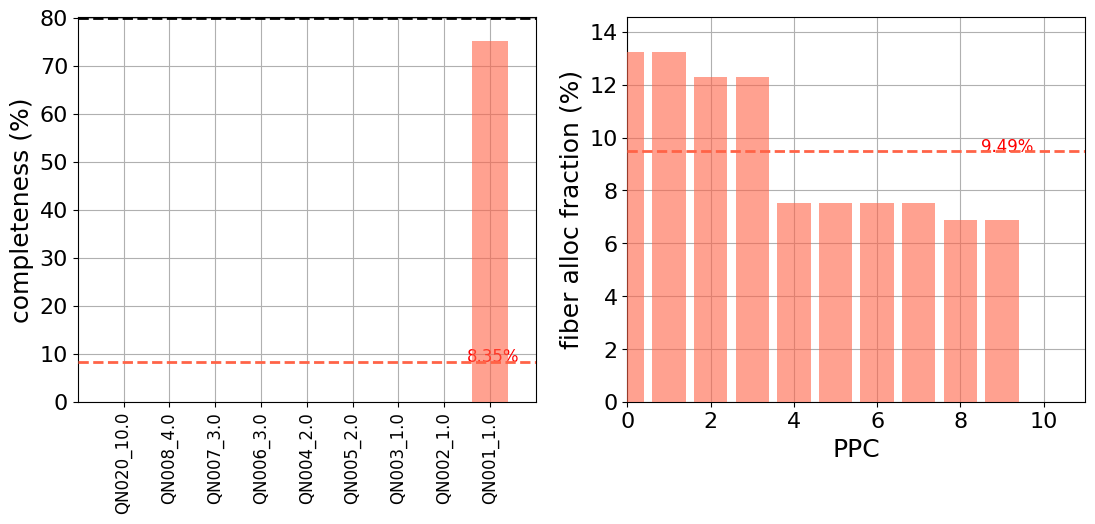

In [4]:
## set the number of pointings to simulate ##
#n_pccs_l = 80
#n_nccs_m = 20
n_pccs_l = 10
n_nccs_m = 5

## run PPP ##
gpd.runPPP(n_pccs_l, n_nccs_m, show_plots=True)

### Run queuePlanner

{'S24B-QN017': S24B-QN017}
1:31:26.62896000000032
1:31:26.62896000000032
1:31:26.62896000000032
1:31:26.62896000000032
2:15:29.489112000000617
2:15:29.489112000000617
0:10:31.816920000000195
0:10:31.816920000000195
0:23:42.142020000000144
0:23:42.142020000000144
Summary_report:
100.00 % of schedulable OBs scheduled
Completed programs

Uncompleted programs
S24B-QN017     10.00  10/10  2.50/2000.00 hrs   0.12%  []

Total time: avail= 1320.00 sched=  150.33 unsched= 1169.67 min

unschedulable: []
completed: []
uncompleted: [{'pgm': S24B-QN017, 'obs': [], 'obcount': 10, 'sched_time': 9000.0, 'total_time': 7200000.0}]
2023-10-08 18:30:00-10:00 2023-10-08 18:30:01-10:00 ob1 None Setup OB: S24B-QN017 Point_L_07433648: 0:8:41.68358400000013 / 2:15:29.489112000000617
2023-10-08 18:30:01-10:00 2023-10-08 19:19:50.065666-10:00 ob2 ob2 Delay for Point_L_07433648 visibility
2023-10-08 19:19:50.065666-10:00 2023-10-08 19:34:50.065666-10:00 Point_L_07433648 Point_L_07433648 0:8:41.68358400000013 / 2:

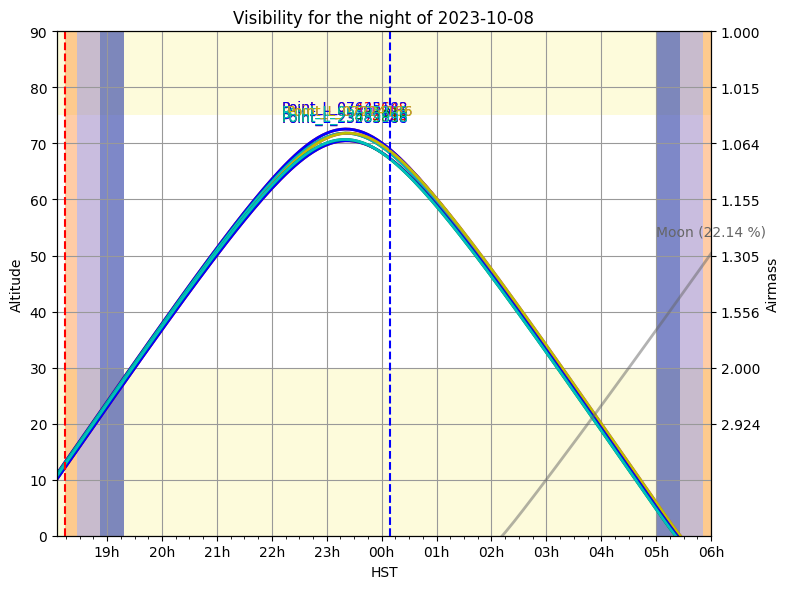

2023-10-09 18:13:29.293448-10:00 2023-10-10 06:04:29.735213-10:00


In [5]:
## run queuePlanner  ##
obs_dates = ["2023-10-08", "2023-10-09"]
gpd.runQPlan(obs_dates, plotVisibility=True)

### Run SFA.py (reconfigure_fibers_ppp)

In [6]:
## make pfsDesign files ##

## currently runSFR does only work after runQPlan has run ##

## specify clearOutput=True if you don't like a long output in the cell below ##
gpd.runSFA(clearOutput=True)

[I 231002 13:34:22 dbutils:200] Query string for fluxstd: 
    SELECT *
        FROM fluxstd
        WHERE q3c_radial_query(ra, dec, 1.9225202, -0.39503945, 1.105)
        
            AND prob_f_star BETWEEN 0.5 AND 1.0
            AND psf_mag_g BETWEEN 14.0 AND 19.0
            AND (version = '2.1');
[I 231002 13:34:22 dbutils:205] Time spent for querying (s): 0.036
[I 231002 13:34:22 dbutils:210] Fetched target DataFrame: 
    Empty DataFrame
    Columns: [fluxstd_id, obj_id, ra, dec, epoch, parallax, parallax_error, pmra, pmra_error, pmdec, pmdec_error, tract, patch, target_type_id, input_catalog_id, psf_mag_g, psf_mag_r, psf_mag_i, psf_mag_z, psf_mag_y, psf_mag_j, psf_mag_error_g, psf_mag_error_r, psf_mag_error_i, psf_mag_error_z, psf_mag_error_y, psf_mag_error_j, psf_flux_g, psf_flux_r, psf_flux_i, psf_flux_z, psf_flux_y, psf_flux_j, psf_flux_error_g, psf_flux_error_r, psf_flux_error_i, psf_flux_error_z, psf_flux_error_y, psf_flux_error_j, filter_g, filter_r, filter_i, filter_z, 

Cobras with zero centers: 0
Cobras with zero link lengths: 0
Cobras with too long link lengths: 0
Number of cobras: 2394
Set parameter Presolve to value 1
Set parameter Method to value 0
Set parameter DegenMoves to value 0
Set parameter Heuristics to value 0.6
Set parameter MIPGap to value 0.005
Set parameter PreSOS2Encoding to value 0
Set parameter PreSOS1Encoding to value 0
Set parameter Threads to value 4
Creating network topology
  exposure 1
Calculating visibilities
adding constraints
adding collision constraints
adding forbidden pair constraints
solving the problem
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: AMD EPYC 7542 32-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 64 physical cores, 128 logical processors, using up to 4 threads

Optimize a model with 639 rows, 728 columns and 1468 nonzeros
Model fingerprint: 0xe0109a73
Variable types: 1 continuous, 727 integer (549 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
 

ERROR:pfi:Some theta angles are out of range
ERROR:pfi:Some phi angles are out of range


Checking for trajectory collisions


ERROR:pfi:Some phi angles are out of range
ERROR:pfi:Some phi angles are out of range
INFO:engineer:Move theta arms to angle=[360. 360. 360. ... 360. 360. 360.] degree
INFO:engineer:Move phi arms to angle=[11.09 24.48 13.06 ...  8.43 11.99  9.16] degree
INFO:engineer:Checking passed homed argument = True
INFO:engineer:Move theta arms CW and phi arms CCW to the hard stops
INFO:cobraCoach:home cobras: theta=10000, phi=-5000
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [   0    1    2 ... 2391 2392 2393], 8 left
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [1782], 7 left
ERROR:pfi:Some phi angles are out of range
INFO:engineer:Move theta arms to angle=[360. 360. 360. ... 360. 360. 360.] degree
INFO:engineer:Move phi arms to angle=[11.09 24.48 13.06 ...  8.43 11.99  9.16] degree
INFO:engineer:Checking passed homed argument = False
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [   0    1    2 ... 2391 2392 2393], 7 left
INFO:cobraCoach:al

trajectory collisions found: 2
Set parameter Presolve to value 1
Set parameter Method to value 0
Set parameter DegenMoves to value 0
Set parameter Heuristics to value 0.6
Set parameter MIPGap to value 0.005
Set parameter PreSOS2Encoding to value 0
Set parameter PreSOS1Encoding to value 0
Set parameter Threads to value 4
Creating network topology
  exposure 1
Calculating visibilities
adding constraints
adding collision constraints
adding forbidden pair constraints
solving the problem
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: AMD EPYC 7542 32-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 64 physical cores, 128 logical processors, using up to 4 threads

Optimize a model with 641 rows, 728 columns and 1471 nonzeros
Model fingerprint: 0x099a84a7
Variable types: 1 continuous, 727 integer (549 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-02, 1e+12]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+

ERROR:pfi:Some theta angles are out of range
ERROR:pfi:Some phi angles are out of range
ERROR:pfi:Some phi angles are out of range
ERROR:pfi:Some phi angles are out of range
INFO:engineer:Move theta arms to angle=[360. 360. 360. ... 360. 360. 360.] degree
INFO:engineer:Move phi arms to angle=[11.09 24.48 13.06 ...  8.43 11.99  9.16] degree
INFO:engineer:Checking passed homed argument = True
INFO:engineer:Move theta arms CW and phi arms CCW to the hard stops
INFO:cobraCoach:home cobras: theta=10000, phi=-5000


Checking for trajectory collisions


ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [   0    1    2 ... 2391 2392 2393], 8 left
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [1782], 7 left
ERROR:pfi:Some phi angles are out of range
INFO:engineer:Move theta arms to angle=[360. 360. 360. ... 360. 360. 360.] degree
INFO:engineer:Move phi arms to angle=[11.09 24.48 13.06 ...  8.43 11.99  9.16] degree
INFO:engineer:Checking passed homed argument = False
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [   0    1    2 ... 2391 2392 2393], 7 left
INFO:cobraCoach:all theta and phi steps are 0, not moving!
INFO:cobraCoach:all theta and phi steps are 0, not moving!
INFO:cobraCoach:all theta and phi steps are 0, not moving!
INFO:cobraCoach:all theta and phi steps are 0, not moving!
INFO:cobraCoach:all theta and phi steps are 0, not moving!
ERROR:pfi:Some theta angles are out of range
ERROR:pfi:Some phi angles are out of range
ERROR:pfi:Some phi angles are out of range
ERROR:pfi:Some phi

trajectory collisions found: 0
Telescope elevation is set to 57.4 degrees                 from the pointing center (1.92252, -0.39504) and observing                     time 2023-10-09T07:35:08Z at Subaru Telescope


[I 231002 13:34:35 reconfigure_fibers_ppp:609] pfsDesign file pfsDesign-0x1553115ac13accea.fits for Point_L_23689998 is created in the /work/pfs/obsproc/e2e/ppp+qplan+sfa/output/design directory.
[I 231002 13:34:35 reconfigure_fibers_ppp:612] Number of SCIENCE fibers: 160
[I 231002 13:34:35 reconfigure_fibers_ppp:617] Number of FLUXSTD fibers: 0
[I 231002 13:34:35 reconfigure_fibers_ppp:622] Number of SKY fibers: 0
[I 231002 13:34:35 reconfigure_fibers_ppp:625] Number of AG stars: 10
[I 231002 13:34:35 reconfigure_fibers_ppp:626] Observation Time: 2023-10-09T07:35:08Z
